# YourCabs

The business problem tackled here is trying to improve customer 
service for YourCabs.com, a cab company in Bangalore. 
The problem of interest is booking cancellations by the company 
due to unavailability of a car. The challenge is that cancellations 
can occur very close to the trip start time, thereby causing 
passengers inconvenience

<b> Objective </b>: 
    
The goal of the competition is to create a predictive model for 
classifying new bookings as to whether they will eventually gets 
cancelled due to car unavailability

## EDA

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
import numpy as np

In [182]:
data = pd.read_csv(r'C:\Users\shamr\OneDrive\Shamreen\ML\LearnBay\Stats&ML\Capstone Project\YourCabs.csv')
data.head(3)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0


In [183]:
#Verify loaded data
data.shape

(43431, 18)

In [184]:
data.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'online_booking', 'mobile_site_booking', 'booking_created', 'from_lat',
       'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

## Feature Engineering

In [186]:
data_features = data.copy()

In [187]:
# Following columns can be dropped 
# id - uniques values
# user_id - personal data, this is not like other online booking apps, here end-user books car
#            through phone call or website
# vehicle_model_id - end-user will not be known as which vehicle or car would be 
#                        booked as end-user contacts agency via phonecall or website
data_features = data_features.drop('id',axis=1)
data_features = data_features.drop('user_id',axis=1)
data_features = data_features.drop('vehicle_model_id',axis=1)
data_features.head(3)

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0


### Extract features and target in separate DataFrame

In [188]:
#data_features = data.iloc[:,:-1]
#Y = data.Car_Cancellation

### Converting object to numericals

In [189]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   package_id           7550 non-null   float64
 1   travel_type_id       43431 non-null  int64  
 2   from_area_id         43343 non-null  float64
 3   to_area_id           34293 non-null  float64
 4   from_city_id         16345 non-null  float64
 5   to_city_id           1588 non-null   float64
 6   from_date            43431 non-null  object 
 7   online_booking       43431 non-null  int64  
 8   mobile_site_booking  43431 non-null  int64  
 9   booking_created      43431 non-null  object 
 10  from_lat             43338 non-null  float64
 11  from_long            43338 non-null  float64
 12  to_lat               34293 non-null  float64
 13  to_long              34293 non-null  float64
 14  Car_Cancellation     43431 non-null  int64  
dtypes: float64(9), int64(4), object(2)
m

### Addition of new features

#### from_day, from_month,from_year

In [190]:
## from_date
data_features['from_date_dt'] = pd.to_datetime(data_features['from_date'])

In [191]:
## from_date
data_features['from_date'] = data_features['from_date'].str.replace('/','-')

fromDatedf = pd.DataFrame(data_features['from_date'].str.split('-').tolist(),
                  columns=['from_date','from_month','from_year'])
fromDatedf['from_hour_timestamp'] = [hour[5:] for hour in fromDatedf['from_year']]
fromDatedf['from_year'] = [year[0:4] for year in fromDatedf['from_year']]

In [192]:
#Remove from_date column
data_features = data_features.drop('from_date',axis=1)
data_features.head(3)

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,from_date_dt
0,NaN,2,83.0,448.0,NaN,NaN,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,2013-01-01 02:00:00
1,NaN,2,1010.0,540.0,NaN,NaN,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,2013-01-01 09:00:00
2,NaN,2,1301.0,1034.0,NaN,NaN,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,2013-01-01 03:30:00


In [193]:
# concatenate two dataframes
data_features = pd.concat([data_features,fromDatedf], axis =1)

#### booking_date, booking_month,booking_year

In [194]:
#booking_created
data_features['booking_created'].values

array(['01-01-2013 01:39', '01-01-2013 02:25', '01-01-2013 03:08', ...,
       '11/24/2013 14:35', '11/24/2013 14:43', '11/24/2013 14:50'],
      dtype=object)

In [195]:
## from_date
data_features['booking_created'] = data_features['booking_created'].str.replace('/','-')

bookingdf = pd.DataFrame(data_features['booking_created'].str.split('-').tolist(),
                  columns=['booking_date','booking_month','booking_year'])
bookingdf['booking_year'] = [year[0:4] for year in bookingdf['booking_year']]

In [196]:
# concatenate two dataframes
data_features = pd.concat([data_features,bookingdf], axis =1)

In [197]:
#Remove booking_created column
data_features = data_features.drop('booking_created',axis=1)
data_features.head(3)

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,...,to_long,Car_Cancellation,from_date_dt,from_date,from_month,from_year,from_hour_timestamp,booking_date,booking_month,booking_year
0,NaN,2,83.0,448.0,NaN,NaN,0,0,12.924150,77.672290,...,77.635750,0,2013-01-01 02:00:00,01,01,2013,02:00,01,01,2013
1,NaN,2,1010.0,540.0,NaN,NaN,0,0,12.966910,77.749350,...,77.626640,0,2013-01-01 09:00:00,01,01,2013,09:00,01,01,2013
2,NaN,2,1301.0,1034.0,NaN,NaN,0,0,12.937222,77.626915,...,77.597766,0,2013-01-01 03:30:00,01,01,2013,03:30,01,01,2013


#### weekend

In [198]:
#weekend feature
data_features['weekend'] = data_features['from_date_dt'].dt.weekday > 4

In [199]:
data_features['weekend'].value_counts() 

False    30247
True     13184
Name: weekend, dtype: int64

In [200]:
#Label encoding 
data_features['weekend'] = data_features['weekend'].map({True:1,False:0})
data_features['weekend'].value_counts()

0    30247
1    13184
Name: weekend, dtype: int64

#### holiday

In [201]:
#holiday 
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [202]:
cal = calendar()
holidays = cal.holidays(start=data_features['from_date_dt'].min(), end=data_features['from_date_dt'].max())
data_features['holiday'] = data_features['from_date_dt'].isin(holidays)

In [203]:
data_features['holiday']

0        False
1        False
2        False
3        False
4        False
         ...  
43426    False
43427    False
43428    False
43429    False
43430    False
Name: holiday, Length: 43431, dtype: bool

In [204]:
#Label encoding 
data_features['holiday'] = data_features['holiday'].map({True:1,False:0})
data_features['holiday'].value_counts()

0    43427
1        4
Name: holiday, dtype: int64

#### festivals

In [205]:
#festivals in India
import holidays 

In [206]:
data_features['festivals'] =  data_features['from_date_dt'].isin(holidays.India(years = data_features['from_year'].astype(int)))

In [207]:
data_features['festivals']

0        False
1        False
2        False
3        False
4        False
         ...  
43426    False
43427    False
43428    False
43429    False
43430    False
Name: festivals, Length: 43431, dtype: bool

In [208]:
#Label encoding 
data_features['festivals'] = data_features['festivals'].map({True:1,False:0})
data_features['festivals'].value_counts()

0    43416
1       15
Name: festivals, dtype: int64

#### hour of day

In [209]:
#hourofday
fromDatedf['from_hour_timestamp'].tail(3)

43428    18:30
43429    16:00
43430     5:00
Name: from_hour_timestamp, dtype: object

In [210]:
def hourOfday(t):
    if int(t)>=4 and int(t)<=8:
        return "EarlyMorning"
    elif int(t)>=8 and int(t)<=12:
        return "Morning"
    elif int(t)>=12 and int(t)<=16:
        return "Afternoon"
    elif int(t)>=16 and int(t)<=20:
        return "Evening"
    elif int(t)>=20 and int(t)<=23:
        return "Night"
    elif int(t)>=23:
        return "MidNight"
    elif int(t)<=4:
        return "MidNight"
       

In [211]:
dd = list()
for hour in fromDatedf['from_hour_timestamp']:
    dd.append(hourOfday(hour.split(':')[0]))
data_features['hourOfDay'] = dd
data_features['hourOfDay'].head()


0        MidNight
1         Morning
2        MidNight
3    EarlyMorning
4         Morning
Name: hourOfDay, dtype: object

In [212]:
data_features['hourOfDay'].value_counts()

EarlyMorning    11579
Evening          8983
Morning          8886
Afternoon        6529
Night            4191
MidNight         3263
Name: hourOfDay, dtype: int64

In [213]:
#Label encoding 
data_features['hourOfDay'] = data_features['hourOfDay'].map({'EarlyMorning':1,'Morning':2,'Afternoon':3,
                                                            'Evening':4,'Night':5,'MidNight':6})
data_features['hourOfDay'].value_counts()

1    11579
4     8983
2     8886
3     6529
5     4191
6     3263
Name: hourOfDay, dtype: int64

In [214]:
data_features = data_features.drop('from_date_dt',axis=1)
data_features = data_features.drop('from_hour_timestamp',axis=1)

In [215]:
#str to int
data_features['from_date'] = data_features['from_date'].astype(int)
data_features['from_month'] = data_features['from_month'].astype(int)
data_features['from_year'] = data_features['from_year'].astype(float)
data_features['booking_date'] = data_features['booking_date'].astype(int)
data_features['booking_month'] = data_features['booking_month'].astype(int)
data_features['booking_year'] = data_features['booking_year'].astype(int)

In [216]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   package_id           7550 non-null   float64
 1   travel_type_id       43431 non-null  int64  
 2   from_area_id         43343 non-null  float64
 3   to_area_id           34293 non-null  float64
 4   from_city_id         16345 non-null  float64
 5   to_city_id           1588 non-null   float64
 6   online_booking       43431 non-null  int64  
 7   mobile_site_booking  43431 non-null  int64  
 8   from_lat             43338 non-null  float64
 9   from_long            43338 non-null  float64
 10  to_lat               34293 non-null  float64
 11  to_long              34293 non-null  float64
 12  Car_Cancellation     43431 non-null  int64  
 13  from_date            43431 non-null  int32  
 14  from_month           43431 non-null  int32  
 15  from_year            43431 non-null 

In [217]:
data_features['travel_type_id'].value_counts()

2    34292
3     7550
1     1589
Name: travel_type_id, dtype: int64

#Observation - 

It is observed that 3 travel types are available and data can be divided into 3 categories


In [218]:
#long distance travel type
data_features_cat1 = data_features[data_features['travel_type_id']==1.0]
data_features_cat1.head(2)

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,...,from_date,from_month,from_year,booking_date,booking_month,booking_year,weekend,holiday,festivals,hourOfDay
6,NaN,1,571.0,NaN,15.0,108.0,0,0,12.951850,77.696420,...,1,1,2013.0,1,1,2013,0,0,0,2
17,NaN,1,1383.0,NaN,NaN,32.0,1,0,12.930451,77.685822,...,1,12,2013.0,1,1,2013,1,0,0,1


In [219]:
#Point to point travel type
data_features_cat2 = data_features[data_features['travel_type_id']==2.0]
data_features_cat2.head(2)

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,...,from_date,from_month,from_year,booking_date,booking_month,booking_year,weekend,holiday,festivals,hourOfDay
0,NaN,2,83.0,448.0,NaN,NaN,0,0,12.92415,77.67229,...,1,1,2013.0,1,1,2013,0,0,0,6
1,NaN,2,1010.0,540.0,NaN,NaN,0,0,12.96691,77.74935,...,1,1,2013.0,1,1,2013,0,0,0,2


In [220]:
#Hourly rent travel type
data_features_cat3 = data_features[data_features['travel_type_id']==3.0]
data_features_cat3.head(2)

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,...,from_date,from_month,from_year,booking_date,booking_month,booking_year,weekend,holiday,festivals,hourOfDay
8,2.0,3,448.0,NaN,NaN,NaN,0,0,12.92732,77.63575,...,1,1,2013.0,1,1,2013,0,0,0,3
20,2.0,3,471.0,NaN,NaN,NaN,0,0,13.01854,77.63524,...,1,1,2013.0,1,1,2013,0,0,0,3


In [221]:
print(f" Data Contents of Travel type 1 (Long distance) - {data_features_cat1.shape} \n \
Data Contents of Travel type 2 (Point-to-Point distance) - {data_features_cat2.shape} \n \
Data Contents of Travel type 3 (Hourly rental) - {data_features_cat3.shape} \n")

 Data Contents of Travel type 1 (Long distance) - (1589, 23) 
 Data Contents of Travel type 2 (Point-to-Point distance) - (34292, 23) 
 Data Contents of Travel type 3 (Hourly rental) - (7550, 23) 



## Category 1 

In [42]:
data_features_cat1.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,...,from_date,from_month,from_year,booking_date,booking_month,booking_year,weekend,holiday,festivals,hourOfDay
6,NaN,1,571.0,NaN,15.0,108.0,0,0,12.951850,77.696420,...,1,1,2013.0,1,1,2013,0,0,0,2
17,NaN,1,1383.0,NaN,NaN,32.0,1,0,12.930451,77.685822,...,1,12,2013.0,1,1,2013,1,0,0,1
24,NaN,1,515.0,NaN,15.0,32.0,0,0,12.978960,77.673450,...,1,5,2013.0,1,1,2013,1,0,0,1
158,NaN,1,136.0,NaN,1.0,152.0,1,0,12.907960,77.624180,...,1,4,2013.0,1,3,2013,0,0,0,2
216,NaN,1,1118.0,NaN,NaN,32.0,1,0,12.930220,77.560390,...,1,6,2013.0,1,4,2013,1,0,0,1


### Null check

In [43]:
data_features_cat1.isnull().sum()

package_id             1589
travel_type_id            0
from_area_id             88
to_area_id             1588
from_city_id            196
to_city_id                1
online_booking            0
mobile_site_booking       0
from_lat                 93
from_long                93
to_lat                 1588
to_long                1588
Car_Cancellation          0
from_date                 0
from_month                0
from_year                 0
booking_date              0
booking_month             0
booking_year              0
weekend                   0
holiday                   0
festivals                 0
hourOfDay                 0
dtype: int64

In [44]:
# null check by percentage
data_features_cat1.isnull().sum()*100/data_features_cat1.shape[0]

package_id             100.000000
travel_type_id           0.000000
from_area_id             5.538074
to_area_id              99.937067
from_city_id            12.334802
to_city_id               0.062933
online_booking           0.000000
mobile_site_booking      0.000000
from_lat                 5.852738
from_long                5.852738
to_lat                  99.937067
to_long                 99.937067
Car_Cancellation         0.000000
from_date                0.000000
from_month               0.000000
from_year                0.000000
booking_date             0.000000
booking_month            0.000000
booking_year             0.000000
weekend                  0.000000
holiday                  0.000000
festivals                0.000000
hourOfDay                0.000000
dtype: float64

In [45]:
# 'package_id','to_area_id','to_lat','to_long' have 90% null values
# remove columns which have 90% null values

data_features_cat1 = data_features_cat1.drop(['package_id','to_area_id','to_lat','to_long'],axis=1)

In [46]:
# feature -> from_area_id
data_features_cat1['from_area_id'].value_counts()

393.0     257
571.0      98
585.0      47
142.0      44
293.0      32
         ... 
727.0       1
1299.0      1
1283.0      1
398.0       1
1180.0      1
Name: from_area_id, Length: 297, dtype: int64

In [47]:
data_features_cat1['from_area_id'][data_features_cat1['from_area_id'].isnull()==True]

3945    NaN
4912    NaN
5144    NaN
5970    NaN
6583    NaN
         ..
41241   NaN
42356   NaN
42846   NaN
42890   NaN
43118   NaN
Name: from_area_id, Length: 88, dtype: float64

In [48]:
data_features_cat1['from_area_id'] = data_features_cat1['from_area_id'].fillna(data_features_cat1['from_area_id'].mean())

In [49]:
data_features_cat1['from_area_id'][data_features_cat1['from_area_id'].isnull()==True]

Series([], Name: from_area_id, dtype: float64)

In [50]:
# feature -> from_lat
data_features_cat1['from_lat'].value_counts()

13.199560    257
12.951850     98
12.976770     55
12.912810     44
12.924150     34
            ... 
12.974967      1
12.893030      1
12.979206      1
12.973535      1
13.047580      1
Name: from_lat, Length: 249, dtype: int64

In [51]:
data_features_cat1['from_lat'][data_features_cat1['from_lat'].isnull()==True]

3945    NaN
4912    NaN
5144    NaN
5970    NaN
6583    NaN
         ..
41241   NaN
42356   NaN
42846   NaN
42890   NaN
43118   NaN
Name: from_lat, Length: 93, dtype: float64

In [52]:
data_features_cat1['from_lat'] = data_features_cat1['from_lat'].fillna(data_features_cat1['from_lat'].mean())

In [53]:
data_features_cat1['from_lat'][data_features_cat1['from_lat'].isnull()==True]

Series([], Name: from_lat, dtype: float64)

In [54]:
# feature -> from_long
data_features_cat1['from_long'].value_counts()

77.706880    257
77.696420     98
77.572700     55
77.609230     44
77.672290     34
            ... 
77.614915      1
77.597010      1
77.709612      1
77.750528      1
77.591840      1
Name: from_long, Length: 249, dtype: int64

In [55]:
data_features_cat1['from_long'][data_features_cat1['from_long'].isnull()==True]

3945    NaN
4912    NaN
5144    NaN
5970    NaN
6583    NaN
         ..
41241   NaN
42356   NaN
42846   NaN
42890   NaN
43118   NaN
Name: from_long, Length: 93, dtype: float64

In [56]:
data_features_cat1['from_long'] = data_features_cat1['from_long'].fillna(data_features_cat1['from_long'].mean())

In [57]:
data_features_cat1['from_long'][data_features_cat1['from_long'].isnull()==True]

Series([], Name: from_long, dtype: float64)

In [58]:
data_features_cat1.head()

,travel_type_id,from_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,Car_Cancellation,from_date,from_month,from_year,booking_date,booking_month,booking_year,weekend,holiday,festivals,hourOfDay
6,1,571.0,15.0,108.0,0,0,12.951850,77.696420,0,1,1,2013.0,1,1,2013,0,0,0,2
17,1,1383.0,NaN,32.0,1,0,12.930451,77.685822,0,1,12,2013.0,1,1,2013,1,0,0,1
24,1,515.0,15.0,32.0,0,0,12.978960,77.673450,0,1,5,2013.0,1,1,2013,1,0,0,1
158,1,136.0,1.0,152.0,1,0,12.907960,77.624180,0,1,4,2013.0,1,3,2013,0,0,0,2
216,1,1118.0,NaN,32.0,1,0,12.930220,77.560390,0,1,6,2013.0,1,4,2013,1,0,0,1


In [59]:
# feature -> from_city_id            
data_features_cat1['from_city_id'].value_counts()

15.0    1281
1.0      106
31.0       6
Name: from_city_id, dtype: int64

In [60]:
data_features_cat1['from_city_id'][data_features_cat1['from_city_id'].isnull()==True]

17      NaN
216     NaN
668     NaN
669     NaN
717     NaN
         ..
24102   NaN
24171   NaN
24265   NaN
24334   NaN
24337   NaN
Name: from_city_id, Length: 196, dtype: float64

In [61]:
data_features_cat1['from_city_id'] = data_features_cat1['from_city_id'].fillna(data_features_cat1['from_city_id'].mode()[0])

In [62]:
data_features_cat1['from_city_id'][data_features_cat1['from_city_id'].isnull()==True]

Series([], Name: from_city_id, dtype: float64)

In [63]:
# feature -> to_city_id            
data_features_cat1['to_city_id'].value_counts()

32.0     475
55.0     174
29.0     116
146.0     89
108.0     64
        ... 
88.0       1
169.0      1
139.0      1
137.0      1
50.0       1
Name: to_city_id, Length: 116, dtype: int64

In [64]:
data_features_cat1['to_city_id'][data_features_cat1['to_city_id'].isnull()==True]

31146   NaN
Name: to_city_id, dtype: float64

In [65]:
data_features_cat1['to_city_id'] = data_features_cat1['to_city_id'].fillna(data_features_cat1['to_city_id'].mean())

In [66]:
data_features_cat1['to_city_id'][data_features_cat1['to_city_id'].isnull()==True]

Series([], Name: to_city_id, dtype: float64)

In [67]:
# null check by percentage
data_features_cat1.isnull().sum()*100/data_features_cat1.shape[0]

travel_type_id         0.0
from_area_id           0.0
from_city_id           0.0
to_city_id             0.0
online_booking         0.0
mobile_site_booking    0.0
from_lat               0.0
from_long              0.0
Car_Cancellation       0.0
from_date              0.0
from_month             0.0
from_year              0.0
booking_date           0.0
booking_month          0.0
booking_year           0.0
weekend                0.0
holiday                0.0
festivals              0.0
hourOfDay              0.0
dtype: float64

### Addition of new feature - Intercity distance

In [68]:
data_features_cat1['intercity_distance']=abs(data_features_cat1['to_city_id']-data_features_cat1['from_city_id'])
data_features_cat1['intercity_distance']

6         93.0
17        17.0
24        17.0
158      151.0
216       17.0
         ...  
43342    176.0
43385    131.0
43386     17.0
43393    101.0
43407     47.0
Name: intercity_distance, Length: 1589, dtype: float64

In [69]:
data_features_cat1['intercity_distance'].describe()

count    1589.000000
mean       54.632812
std        49.751055
min         1.000000
25%        17.000000
50%        34.000000
75%        93.000000
max       189.000000
Name: intercity_distance, dtype: float64

In [70]:
data_features_cat1 = data_features_cat1.drop('from_city_id',axis=1)
data_features_cat1 = data_features_cat1.drop('to_city_id',axis=1)

### Addition of new feature - Cancellation zone

In [71]:
#cancellation zone
zone_df = data_features_cat1.groupby(['from_area_id', 'Car_Cancellation']).agg({'Car_Cancellation': 'count'})
Area = data_features_cat1.groupby(['from_area_id']).agg({'Car_Cancellation': 'count'})
zone_df=zone_df.div(Area, level='from_area_id') * 100
#zone_df = zone_df.fillna(0)
zone_df.loc[61.0]['Car_Cancellation'][1]

16.666666666666664

In [72]:
zl = []
for area in data_features_cat1['from_area_id']:
    try:
        zl.append(zone_df.loc[area]['Car_Cancellation'][1])
    except:
        zl.append(0)
data_features_cat1['cancel_zone%'] = zl

In [73]:
data_features_cat1['cancel_zone%'].value_counts()

0.000000     979
0.389105     257
2.040816      98
2.272727      88
2.127660      47
3.448276      29
7.142857      14
7.692308      13
9.090909      11
22.222222      9
11.111111      9
12.500000      8
14.285714      7
16.666667      6
50.000000      6
20.000000      5
33.333333      3
Name: cancel_zone%, dtype: int64

In [74]:
def cancel_zone(data):
    if data==0:
        return 0 #Zero Cancel Zone
    elif data>0 and data<=30:
        return 1 #Low Cancel Zone
    elif data>30 and data<=60:
        return 2 #Mid Cancel Zone
    elif data>60 and data<=100:
        return 3 #High Cancel Zone

In [75]:
data_features_cat1['cancel_zone'] = data_features_cat1['cancel_zone%'].apply(cancel_zone)
data_features_cat1['cancel_zone']

6        1
17       0
24       0
158      0
216      0
        ..
43342    1
43385    0
43386    0
43393    1
43407    0
Name: cancel_zone, Length: 1589, dtype: int64

In [76]:
data_features_cat1['cancel_zone'].value_counts()

0    979
1    601
2      9
Name: cancel_zone, dtype: int64

In [77]:
#cancel_zone% and from_area can be dropped now

data_features_cat1 = data_features_cat1.drop('cancel_zone%',axis=1)
data_features_cat1 = data_features_cat1.drop('from_area_id',axis=1)

In [78]:
#as area_code is removed, from_lat is also removed
data_features_cat1 = data_features_cat1.drop('from_lat',axis=1)

### Outlier check 

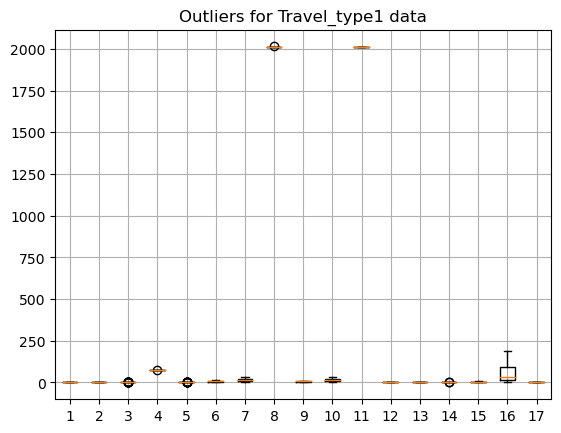

In [79]:
plt.boxplot(data_features_cat1)
plt.grid()
plt.title("Outliers for Travel_type1 data")
plt.show()

In [80]:
#Observation - No outliers in Category1 data

In [81]:
corr_mat = data_features_cat1.corr()

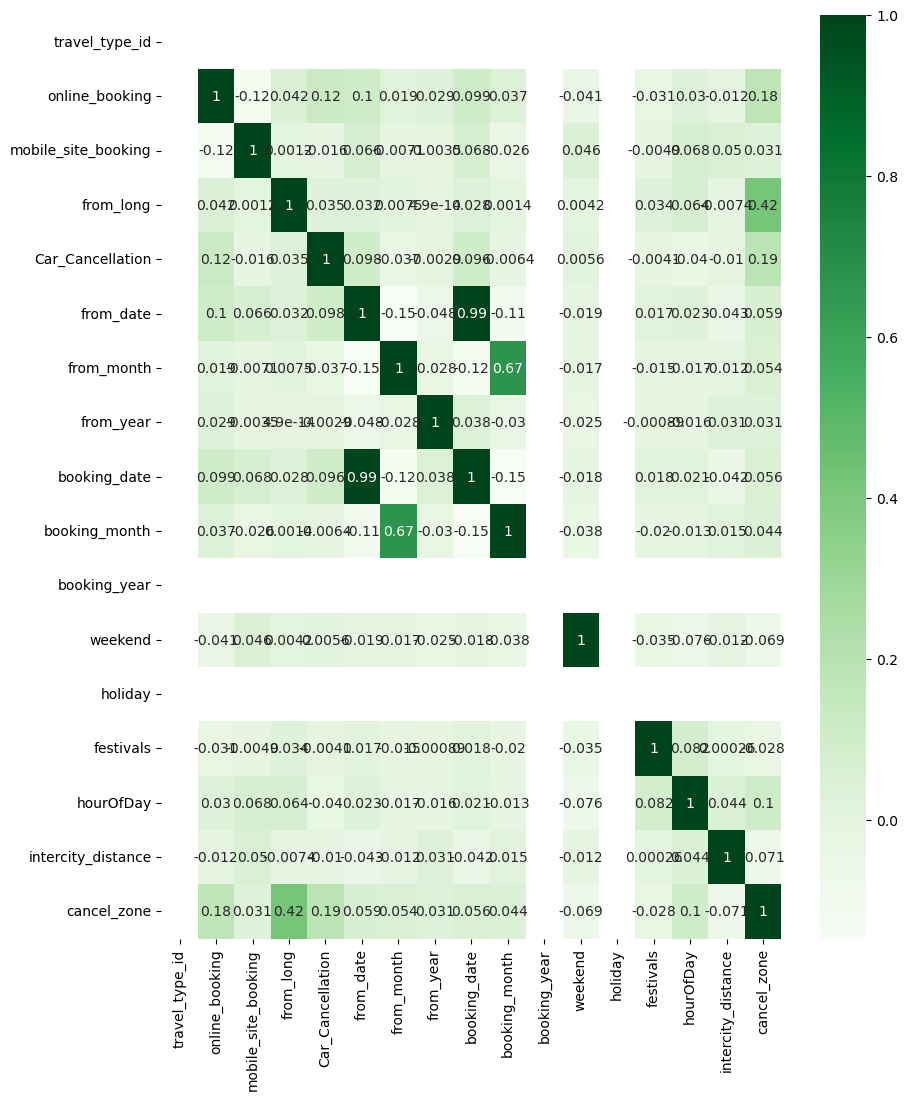

In [82]:
plt.figure(figsize=(10,12))
sns.heatmap(corr_mat,annot=True,cmap='Greens')
plt.show()

# Observation
1. Booking_date and from_date has very high correlation - 99%
2. From_month and booking_month has very high correlation - 99%
3. From_long and from_lat has moderately high correlation - 40%
4. travel_type_id,booking_year,holiday may have 1 value so Correlation data is not available

Conclusion -

1. Booking_date, From_month and From_long can be dropped
2. travel_type_id,booking_year,holiday can be dropped

In [83]:
data_features_cat1 = data_features_cat1.drop('booking_date',axis=1)
data_features_cat1 = data_features_cat1.drop('from_month',axis=1)
data_features_cat1 = data_features_cat1.drop('from_long',axis=1)
data_features_cat1.head()

,travel_type_id,online_booking,mobile_site_booking,Car_Cancellation,from_date,from_year,booking_month,booking_year,weekend,holiday,festivals,hourOfDay,intercity_distance,cancel_zone
6,1,0,0,0,1,2013.0,1,2013,0,0,0,2,93.0,1
17,1,1,0,0,1,2013.0,1,2013,1,0,0,1,17.0,0
24,1,0,0,0,1,2013.0,1,2013,1,0,0,1,17.0,0
158,1,1,0,0,1,2013.0,3,2013,0,0,0,2,151.0,0
216,1,1,0,0,1,2013.0,4,2013,1,0,0,1,17.0,0


In [84]:
data_features_cat1['travel_type_id'].value_counts()

1    1589
Name: travel_type_id, dtype: int64

In [85]:
data_features_cat1 = data_features_cat1.drop('booking_year',axis=1)
data_features_cat1 = data_features_cat1.drop('travel_type_id',axis=1)
data_features_cat1 = data_features_cat1.drop('holiday',axis=1)
data_features_cat1.head()

,online_booking,mobile_site_booking,Car_Cancellation,from_date,from_year,booking_month,weekend,festivals,hourOfDay,intercity_distance,cancel_zone
6,0,0,0,1,2013.0,1,0,0,2,93.0,1
17,1,0,0,1,2013.0,1,1,0,1,17.0,0
24,0,0,0,1,2013.0,1,1,0,1,17.0,0
158,1,0,0,1,2013.0,3,0,0,2,151.0,0
216,1,0,0,1,2013.0,4,1,0,1,17.0,0


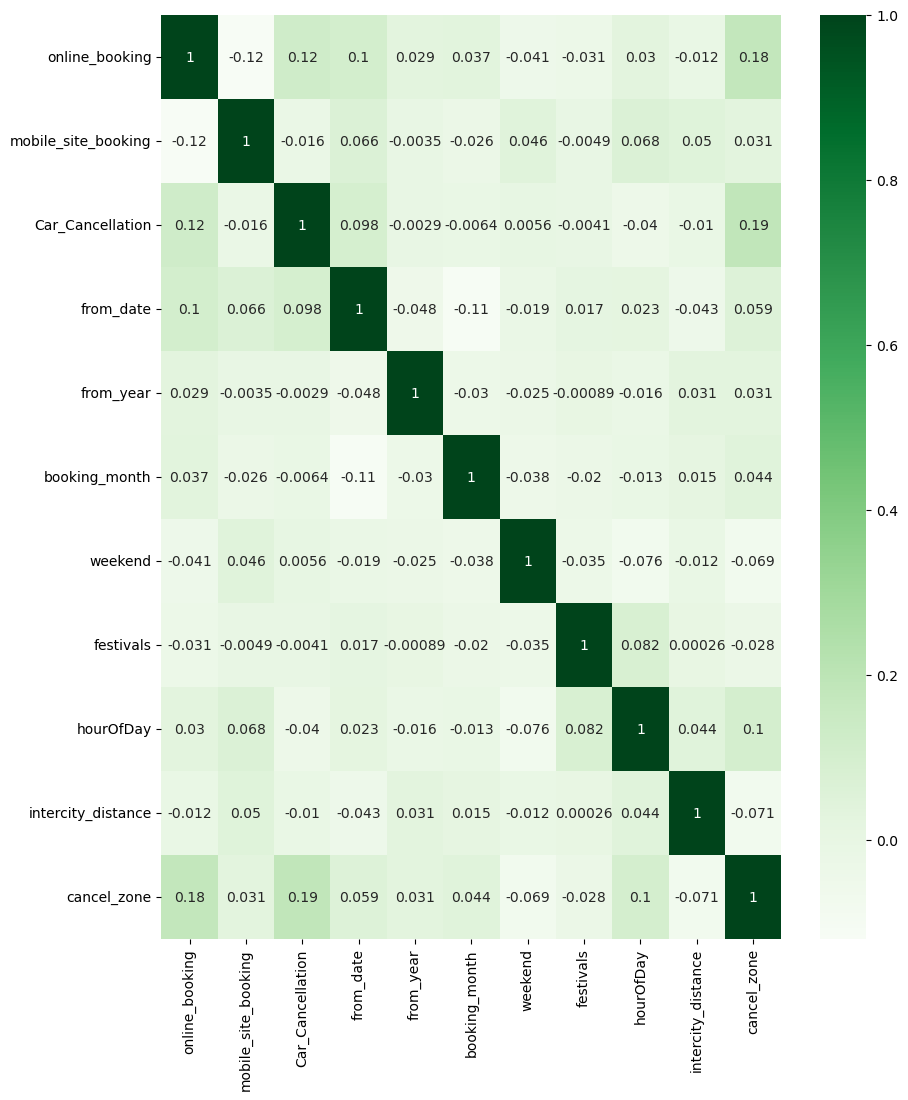

In [86]:
plt.figure(figsize=(10,12))
sns.heatmap(data_features_cat1.corr(),annot=True,cmap='Greens')
plt.show()

### Feature wise check

In [87]:
data_features_cat1.columns

Index(['online_booking', 'mobile_site_booking', 'Car_Cancellation',
       'from_date', 'from_year', 'booking_month', 'weekend', 'festivals',
       'hourOfDay', 'intercity_distance', 'cancel_zone'],
      dtype='object')

In [88]:
data_features_cat1['intercity_distance'].value_counts()

17.0     445
40.0     165
14.0     108
131.0     83
93.0      63
        ... 
115.0      1
157.0      1
189.0      1
159.0      1
35.0       1
Name: intercity_distance, Length: 127, dtype: int64

In [89]:
data_features_cat1['online_booking'].value_counts()

0    910
1    679
Name: online_booking, dtype: int64

In [90]:
data_features_cat1['mobile_site_booking'].value_counts()

0    1559
1      30
Name: mobile_site_booking, dtype: int64

In [91]:
data_features_cat1['from_date'].value_counts()

10    214
6     182
8     174
5     173
9     160
7     145
4     142
11    129
3     109
1      87
2      71
12      3
Name: from_date, dtype: int64

In [92]:
data_features_cat1['from_year'].value_counts()

2013.0    1588
2014.0       1
Name: from_year, dtype: int64

In [93]:
data_features_cat1['weekend'].value_counts()

0    795
1    794
Name: weekend, dtype: int64

In [94]:
data_features_cat1['booking_month'].value_counts()

12    83
5     66
13    66
11    63
8     58
17    58
25    57
7     57
16    57
14    55
23    54
9     53
22    52
10    52
6     52
21    50
18    50
28    49
1     49
3     49
29    48
26    47
19    45
24    45
4     43
20    41
2     41
15    41
30    39
27    38
31    31
Name: booking_month, dtype: int64

In [95]:
data_features_cat1['from_year'].value_counts()

2013.0    1588
2014.0       1
Name: from_year, dtype: int64

#Observation 

from_year has 90% same values - this can be dropped

In [96]:
data_features_cat1 = data_features_cat1.drop('from_year',axis=1)

In [97]:
data_features_cat1['cancel_zone'].value_counts()

0    979
1    601
2      9
Name: cancel_zone, dtype: int64

In [98]:
data_features_cat1['Car_Cancellation'].value_counts()

0    1568
1      21
Name: Car_Cancellation, dtype: int64

### Final data features with traveltype=1 values

In [99]:
data_features_cat1.head()

,online_booking,mobile_site_booking,Car_Cancellation,from_date,booking_month,weekend,festivals,hourOfDay,intercity_distance,cancel_zone
6,0,0,0,1,1,0,0,2,93.0,1
17,1,0,0,1,1,1,0,1,17.0,0
24,0,0,0,1,1,1,0,1,17.0,0
158,1,0,0,1,3,0,0,2,151.0,0
216,1,0,0,1,4,1,0,1,17.0,0


In [100]:
data_features_cat1.shape

(1589, 10)

In [101]:
data_features_cat1.describe()

,online_booking,mobile_site_booking,Car_Cancellation,from_date,booking_month,weekend,festivals,hourOfDay,intercity_distance,cancel_zone
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,0.427313,0.018880,0.013216,6.622404,15.381372,0.499685,0.001259,2.108874,54.632812,0.389553
std,0.494844,0.136143,0.114234,2.910876,8.559206,0.500157,0.035466,1.689754,49.751055,0.499286
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,4.000000,8.000000,0.000000,0.000000,1.000000,17.000000,0.000000
50%,0.000000,0.000000,0.000000,7.000000,15.000000,0.000000,0.000000,1.000000,34.000000,0.000000
75%,1.000000,0.000000,0.000000,9.000000,23.000000,1.000000,0.000000,3.000000,93.000000,1.000000
max,1.000000,1.000000,1.000000,12.000000,31.000000,1.000000,1.000000,6.000000,189.000000,2.000000


In [102]:
data_features_cat1.to_csv(r'C:\Users\shamr\OneDrive\Shamreen\ML\LearnBay\Stats&ML\Capstone Project\Dataset\cat1.csv')

## Category 2

In [103]:
data_features_cat2.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,...,from_date,from_month,from_year,booking_date,booking_month,booking_year,weekend,holiday,festivals,hourOfDay
0,NaN,2,83.0,448.0,NaN,NaN,0,0,12.924150,77.672290,...,1,1,2013.0,1,1,2013,0,0,0,6
1,NaN,2,1010.0,540.0,NaN,NaN,0,0,12.966910,77.749350,...,1,1,2013.0,1,1,2013,0,0,0,2
2,NaN,2,1301.0,1034.0,NaN,NaN,0,0,12.937222,77.626915,...,1,1,2013.0,1,1,2013,0,0,0,6
3,NaN,2,768.0,398.0,NaN,NaN,0,0,12.989990,77.553320,...,1,1,2013.0,1,1,2013,0,0,0,1
4,NaN,2,1365.0,849.0,NaN,NaN,0,0,12.845653,77.677925,...,1,1,2013.0,1,1,2013,0,0,0,2


### Null check

In [104]:
data_features_cat2.isnull().sum()

package_id             34292
travel_type_id             0
from_area_id               0
to_area_id                 0
from_city_id           19788
to_city_id             34292
online_booking             0
mobile_site_booking        0
from_lat                   0
from_long                  0
to_lat                     0
to_long                    0
Car_Cancellation           0
from_date                  0
from_month                 0
from_year                  0
booking_date               0
booking_month              0
booking_year               0
weekend                    0
holiday                    0
festivals                  0
hourOfDay                  0
dtype: int64

In [105]:
# null check by percentage
data_features_cat2.isnull().sum()*100/data_features_cat2.shape[0]

package_id             100.000000
travel_type_id           0.000000
from_area_id             0.000000
to_area_id               0.000000
from_city_id            57.704421
to_city_id             100.000000
online_booking           0.000000
mobile_site_booking      0.000000
from_lat                 0.000000
from_long                0.000000
to_lat                   0.000000
to_long                  0.000000
Car_Cancellation         0.000000
from_date                0.000000
from_month               0.000000
from_year                0.000000
booking_date             0.000000
booking_month            0.000000
booking_year             0.000000
weekend                  0.000000
holiday                  0.000000
festivals                0.000000
hourOfDay                0.000000
dtype: float64

In [106]:
# 'package_id','to_city_id','from_city_id' have 90% null values
# remove columns which have 90% null values

data_features_cat2 = data_features_cat2.drop(['package_id','to_city_id','from_city_id'],axis=1)

In [107]:
# null check by percentage
data_features_cat2.isnull().sum()*100/data_features_cat2.shape[0]

travel_type_id         0.0
from_area_id           0.0
to_area_id             0.0
online_booking         0.0
mobile_site_booking    0.0
from_lat               0.0
from_long              0.0
to_lat                 0.0
to_long                0.0
Car_Cancellation       0.0
from_date              0.0
from_month             0.0
from_year              0.0
booking_date           0.0
booking_month          0.0
booking_year           0.0
weekend                0.0
holiday                0.0
festivals              0.0
hourOfDay              0.0
dtype: float64

### Addition of new feature - distance from lat+long

In [115]:
import math as m

def distance(lat1,lat2,lon1,lon2):
    return int(m.acos((m.sin(m.radians(lat1)) * m.sin(m.radians(lat2))) + (m.cos(m.radians(lat1)) 
        * m.cos(m.radians(lat2))) * (m.cos(m.radians(lon2) - m.radians(lon1)))) * 6371)

In [116]:
data_features_cat2['distance'] = data_features_cat2.apply(lambda x: distance(x['from_lat'], x['from_long'],x['to_lat'],x['to_long']), axis=1)
data_features_cat2['distance']

0        8016
1        8015
2        8009
3        8003
4        8024
         ... 
43425    8005
43426    8002
43427    7986
43429    8008
43430    8005
Name: distance, Length: 34292, dtype: int64

In [117]:
data_features_cat2['distance'].describe()

count    34292.000000
mean      8006.015514
std          9.203739
min       7966.000000
25%       8001.000000
50%       8008.000000
75%       8012.000000
max       8040.000000
Name: distance, dtype: float64

In [118]:
data_features_cat2 = data_features_cat2.drop('from_lat',axis=1)
data_features_cat2 = data_features_cat2.drop('to_lat',axis=1)
data_features_cat2 = data_features_cat2.drop('from_long',axis=1)
data_features_cat2 = data_features_cat2.drop('to_long',axis=1)

### Addition of new feature - Cancellation zone

### cancellation zone - from_area_id

In [120]:
#cancellation zone - from_area_id
zone_df = data_features_cat2.groupby(['from_area_id', 'Car_Cancellation']).agg({'Car_Cancellation': 'count'})
Area = data_features_cat2.groupby(['from_area_id']).agg({'Car_Cancellation': 'count'})
zone_df=zone_df.div(Area, level='from_area_id') * 100
#zone_df = zone_df.fillna(0)
zone_df.loc[61.0]['Car_Cancellation'][1]

14.705882352941178

In [121]:
zl = []
for area in data_features_cat2['from_area_id']:
    try:
        zl.append(zone_df.loc[area]['Car_Cancellation'][1])
    except:
        zl.append(0)
data_features_cat2['cancel_zone%'] = zl

In [122]:
data_features_cat2['cancel_zone%'].value_counts()

3.407407      3375
0.000000      1759
9.599332      1198
2.882206       798
10.131579      760
              ... 
36.363636       11
42.857143        7
66.666667        6
80.000000        5
100.000000       1
Name: cancel_zone%, Length: 221, dtype: int64

In [124]:
def cancel_zone(data):
    if data==0:
        return 0 #Zero Cancel Zone
    elif data>0 and data<=30:
        return 1 #Low Cancel Zone
    elif data>30 and data<=60:
        return 2 #Mid Cancel Zone
    elif data>60 and data<=100:
        return 3 #High Cancel Zone

In [125]:
data_features_cat2['from_cancel_zone'] = data_features_cat2['cancel_zone%'].apply(cancel_zone)
data_features_cat2['from_cancel_zone']

0        1
1        1
2        1
3        1
4        1
        ..
43425    1
43426    1
43427    1
43429    1
43430    1
Name: from_cancel_zone, Length: 34292, dtype: int64

In [127]:
data_features_cat2['from_cancel_zone'].value_counts()

1    32134
0     1759
2      387
3       12
Name: from_cancel_zone, dtype: int64

In [128]:
#cancel_zone% and from_area can be dropped now

data_features_cat2 = data_features_cat2.drop('cancel_zone%',axis=1)
data_features_cat2 = data_features_cat2.drop('from_area_id',axis=1)

### cancellation zone - to_area_id

In [130]:
#cancellation zone - from_area_id
zone_df = data_features_cat2.groupby(['to_area_id', 'Car_Cancellation']).agg({'Car_Cancellation': 'count'})
Area = data_features_cat2.groupby(['to_area_id']).agg({'Car_Cancellation': 'count'})
zone_df=zone_df.div(Area, level='to_area_id') * 100
#zone_df = zone_df.fillna(0)
zone_df.loc[61.0]['Car_Cancellation'][1]

17.441860465116278

In [131]:
zl = []
for area in data_features_cat2['to_area_id']:
    try:
        zl.append(zone_df.loc[area]['Car_Cancellation'][1])
    except:
        zl.append(0)
data_features_cat2['cancel_zone%'] = zl

In [132]:
data_features_cat2['cancel_zone%'].value_counts()

1.515324      8777
12.654981     2339
0.000000      1239
10.913500     1237
8.132530       664
              ... 
23.076923       13
100.000000       8
37.500000        8
66.666667        6
75.000000        4
Name: cancel_zone%, Length: 187, dtype: int64

In [133]:
def cancel_zone(data):
    if data==0:
        return 0 #Zero Cancel Zone
    elif data>0 and data<=30:
        return 1 #Low Cancel Zone
    elif data>30 and data<=60:
        return 2 #Mid Cancel Zone
    elif data>60 and data<=100:
        return 3 #High Cancel Zone

In [134]:
data_features_cat2['to_cancel_zone'] = data_features_cat2['cancel_zone%'].apply(cancel_zone)
data_features_cat2['to_cancel_zone']

0        1
1        1
2        1
3        0
4        1
        ..
43425    2
43426    1
43427    1
43429    1
43430    1
Name: to_cancel_zone, Length: 34292, dtype: int64

In [135]:
data_features_cat2['to_cancel_zone'].value_counts()

1    32679
0     1239
2      356
3       18
Name: to_cancel_zone, dtype: int64

In [136]:
#cancel_zone% and from_area can be dropped now

data_features_cat2 = data_features_cat2.drop('cancel_zone%',axis=1)
data_features_cat2 = data_features_cat2.drop('to_area_id',axis=1)

In [138]:
data_features_cat2.head(2)

,travel_type_id,online_booking,mobile_site_booking,Car_Cancellation,from_date,from_month,from_year,booking_date,booking_month,booking_year,weekend,holiday,festivals,hourOfDay,distance,from_cancel_zone,to_cancel_zone
0,2,0,0,0,1,1,2013.0,1,1,2013,0,0,0,6,8016,1,1
1,2,0,0,0,1,1,2013.0,1,1,2013,0,0,0,2,8015,1,1


### Outlier check 

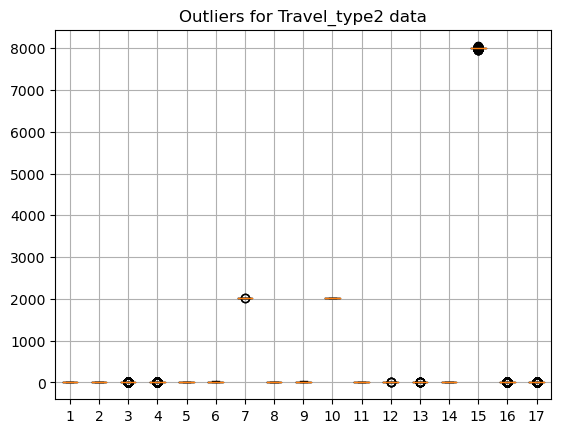

In [139]:
plt.boxplot(data_features_cat2)
plt.grid()
plt.title("Outliers for Travel_type2 data")
plt.show()

In [140]:
#Observation - No outliers in Category2 data

In [141]:
corr_mat = data_features_cat2.corr()

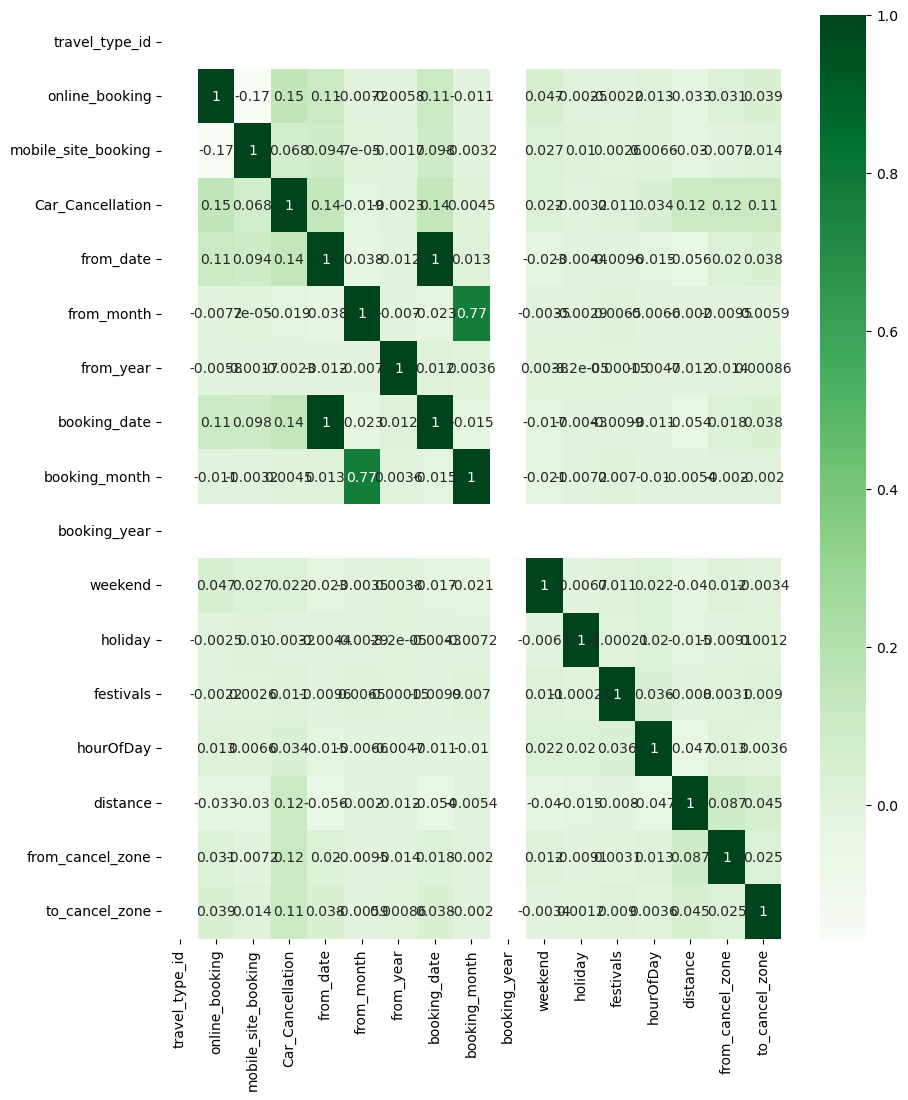

In [142]:
plt.figure(figsize=(10,12))
sns.heatmap(corr_mat,annot=True,cmap='Greens')
plt.show()

# Observation
1. Booking_year and travel_type_id has only 1 value, these can be dropped
2. booking_month and from_month has high correlation - 77%
3. from_date and booking_date has very high correlation - 100%


Conclusion -

Booking_year, travel_type_id, booking_date and booking_month can be dropped


In [143]:
data_features_cat2 = data_features_cat2.drop('booking_month',axis=1)
data_features_cat2 = data_features_cat2.drop('booking_date',axis=1)
data_features_cat2 = data_features_cat2.drop('booking_year',axis=1)
data_features_cat2 = data_features_cat2.drop('travel_type_id',axis=1)
data_features_cat2.head()

,online_booking,mobile_site_booking,Car_Cancellation,from_date,from_month,from_year,weekend,holiday,festivals,hourOfDay,distance,from_cancel_zone,to_cancel_zone
0,0,0,0,1,1,2013.0,0,0,0,6,8016,1,1
1,0,0,0,1,1,2013.0,0,0,0,2,8015,1,1
2,0,0,0,1,1,2013.0,0,0,0,6,8009,1,1
3,0,0,0,1,1,2013.0,0,0,0,1,8003,1,0
4,0,0,0,1,1,2013.0,0,0,0,2,8024,1,1


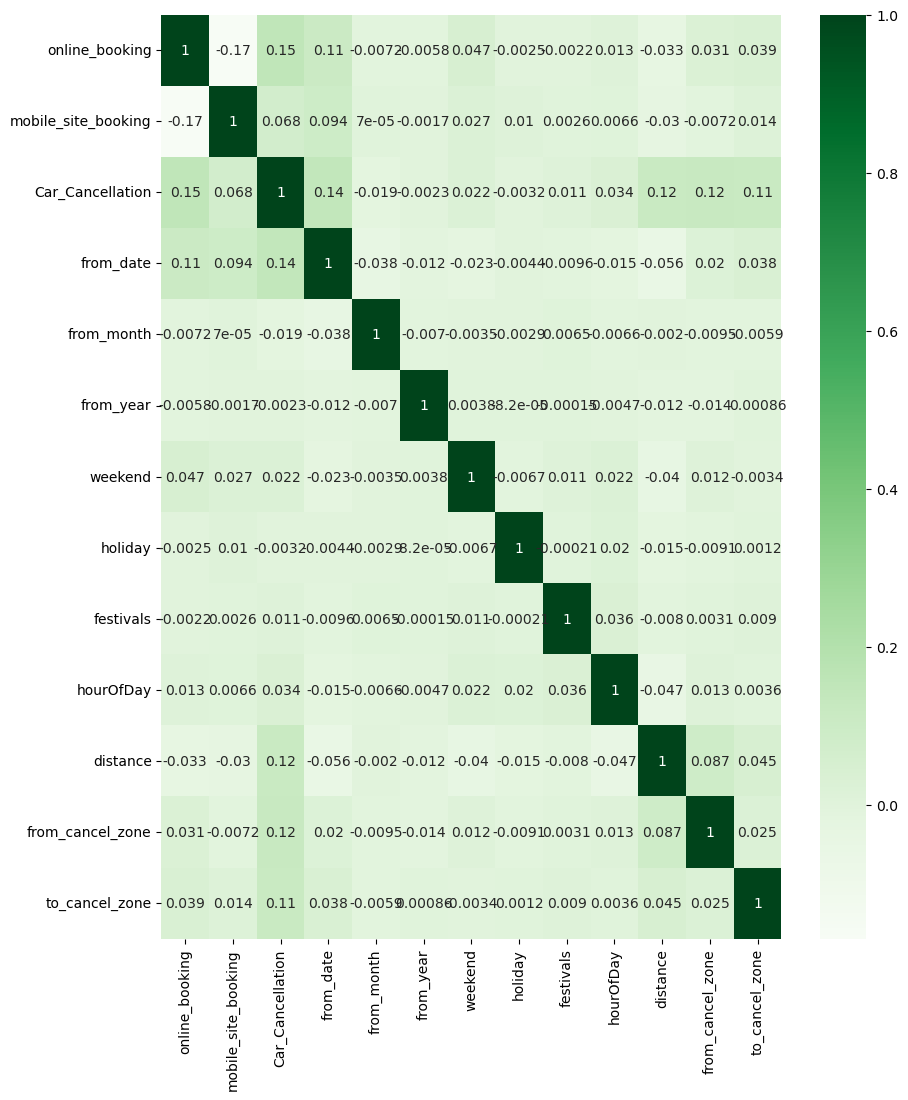

In [144]:
plt.figure(figsize=(10,12))
sns.heatmap(data_features_cat2.corr(),annot=True,cmap='Greens')
plt.show()

### Feature wise check

In [145]:
data_features_cat2.columns

Index(['online_booking', 'mobile_site_booking', 'Car_Cancellation',
       'from_date', 'from_month', 'from_year', 'weekend', 'holiday',
       'festivals', 'hourOfDay', 'distance', 'from_cancel_zone',
       'to_cancel_zone'],
      dtype='object')

In [146]:
data_features_cat2['online_booking'].value_counts()

0    21842
1    12450
Name: online_booking, dtype: int64

In [147]:
data_features_cat2['mobile_site_booking'].value_counts()

0    32643
1     1649
Name: mobile_site_booking, dtype: int64

In [148]:
data_features_cat2['from_date'].value_counts()

8     4417
7     4019
10    3734
9     3650
6     3411
5     3312
11    2484
4     2439
2     2354
1     2305
3     2151
12      16
Name: from_date, dtype: int64

In [149]:
data_features_cat2['from_month'].value_counts()

11    1229
1     1226
12    1225
10    1219
14    1196
20    1174
9     1160
7     1148
23    1143
13    1137
15    1137
17    1135
21    1131
8     1125
2     1125
22    1123
19    1115
3     1115
6     1103
26    1098
18    1084
4     1076
16    1064
5     1062
24    1054
28    1047
25    1044
30    1027
27     988
29     937
31     845
Name: from_month, dtype: int64

In [150]:
data_features_cat2['from_year'].value_counts()

2013.0    34290
2014.0        2
Name: from_year, dtype: int64

In [151]:
# Observation , from_year has 90% same value, it can create bias, can be dropped
data_features_cat2 = data_features_cat2.drop('from_year',axis=1)

In [152]:
data_features_cat2['Car_Cancellation'].value_counts()

0    31517
1     2775
Name: Car_Cancellation, dtype: int64

In [154]:
data_features_cat2['weekend'].value_counts()

0    24759
1     9533
Name: weekend, dtype: int64

In [163]:
data_features_cat2['holiday'].value_counts()

0    34288
1        4
Name: holiday, dtype: int64

In [165]:
#holidays have 90% same data, instead of dropping them and lose information we can combine it with 
#festivals column

In [166]:
data_features_cat2['festivals'] = data_features_cat2['festivals'] + data_features_cat2['holiday']

In [167]:
data_features_cat2['festivals'].value_counts()

0    34275
1       17
Name: festivals, dtype: int64

In [168]:
data_features_cat2['hourOfDay'].value_counts()

1    9123
4    7814
2    5725
3    4779
5    3940
6    2911
Name: hourOfDay, dtype: int64

In [169]:
data_features_cat2['distance'].value_counts()

8010    2436
8012    2165
8009    2129
8007    1909
8006    1867
        ... 
8040       1
8038       1
8036       1
7970       1
7967       1
Name: distance, Length: 62, dtype: int64

In [170]:
data_features_cat2['from_cancel_zone'].value_counts()

1    32134
0     1759
2      387
3       12
Name: from_cancel_zone, dtype: int64

In [171]:
data_features_cat2['to_cancel_zone'].value_counts()

1    32679
0     1239
2      356
3       18
Name: to_cancel_zone, dtype: int64

### Final data features with traveltype=2 values

In [172]:
data_features_cat2.head()

,online_booking,mobile_site_booking,Car_Cancellation,from_date,from_month,weekend,holiday,festivals,hourOfDay,distance,from_cancel_zone,to_cancel_zone
0,0,0,0,1,1,0,0,0,6,8016,1,1
1,0,0,0,1,1,0,0,0,2,8015,1,1
2,0,0,0,1,1,0,0,0,6,8009,1,1
3,0,0,0,1,1,0,0,0,1,8003,1,0
4,0,0,0,1,1,0,0,0,2,8024,1,1


In [173]:
data_features_cat2.shape

(34292, 12)

In [174]:
data_features_cat2.describe()

,online_booking,mobile_site_booking,Car_Cancellation,from_date,from_month,weekend,holiday,festivals,hourOfDay,distance,from_cancel_zone,to_cancel_zone
count,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000
mean,0.363058,0.048087,0.080923,6.456987,15.597632,0.277995,0.000117,0.000496,3.013298,8006.015514,0.960691,0.975300
std,0.480889,0.213953,0.272720,2.945519,8.784380,0.448017,0.010800,0.022260,1.637819,9.203739,0.249873,0.219096
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,7966.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,4.000000,8.000000,0.000000,0.000000,0.000000,1.000000,8001.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,7.000000,15.000000,0.000000,0.000000,0.000000,3.000000,8008.000000,1.000000,1.000000
75%,1.000000,0.000000,0.000000,9.000000,23.000000,1.000000,0.000000,0.000000,4.000000,8012.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,12.000000,31.000000,1.000000,1.000000,1.000000,6.000000,8040.000000,3.000000,3.000000


In [175]:
data_features_cat2.to_csv(r'C:\Users\shamr\OneDrive\Shamreen\ML\LearnBay\Stats&ML\Capstone Project\Dataset\cat2.csv')

## Category 3

In [222]:
data_features_cat3.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,...,from_date,from_month,from_year,booking_date,booking_month,booking_year,weekend,holiday,festivals,hourOfDay
8,2.0,3,448.0,NaN,NaN,NaN,0,0,12.927320,77.635750,...,1,1,2013.0,1,1,2013,0,0,0,3
20,2.0,3,471.0,NaN,NaN,NaN,0,0,13.018540,77.635240,...,1,1,2013.0,1,1,2013,0,0,0,3
23,1.0,3,1286.0,NaN,NaN,NaN,0,0,12.973448,77.620320,...,1,1,2013.0,1,1,2013,0,0,0,3
34,1.0,3,1323.0,NaN,NaN,NaN,1,0,12.869805,77.653211,...,1,1,2013.0,1,1,2013,0,0,0,4
47,2.0,3,142.0,NaN,NaN,NaN,0,0,12.912810,77.609230,...,1,2,2013.0,1,1,2013,0,0,0,6


### Null check

In [223]:
data_features_cat3.isnull().sum()

package_id                0
travel_type_id            0
from_area_id              0
to_area_id             7550
from_city_id           7102
to_city_id             7550
online_booking            0
mobile_site_booking       0
from_lat                  0
from_long                 0
to_lat                 7550
to_long                7550
Car_Cancellation          0
from_date                 0
from_month                0
from_year                 0
booking_date              0
booking_month             0
booking_year              0
weekend                   0
holiday                   0
festivals                 0
hourOfDay                 0
dtype: int64

In [224]:
# null check by percentage
data_features_cat3.isnull().sum()*100/data_features_cat3.shape[0]

package_id               0.000000
travel_type_id           0.000000
from_area_id             0.000000
to_area_id             100.000000
from_city_id            94.066225
to_city_id             100.000000
online_booking           0.000000
mobile_site_booking      0.000000
from_lat                 0.000000
from_long                0.000000
to_lat                 100.000000
to_long                100.000000
Car_Cancellation         0.000000
from_date                0.000000
from_month               0.000000
from_year                0.000000
booking_date             0.000000
booking_month            0.000000
booking_year             0.000000
weekend                  0.000000
holiday                  0.000000
festivals                0.000000
hourOfDay                0.000000
dtype: float64

In [225]:
# 'to_area_id','from_city_id','to_city_id','to_lat','to_long' have 90%-100% null values
# remove columns which have 90% null values

data_features_cat3 = data_features_cat3.drop(['to_area_id','from_city_id','to_city_id','to_lat','to_long'],axis=1)

In [226]:
# null check by percentage
data_features_cat3.isnull().sum()*100/data_features_cat3.shape[0]

package_id             0.0
travel_type_id         0.0
from_area_id           0.0
online_booking         0.0
mobile_site_booking    0.0
from_lat               0.0
from_long              0.0
Car_Cancellation       0.0
from_date              0.0
from_month             0.0
from_year              0.0
booking_date           0.0
booking_month          0.0
booking_year           0.0
weekend                0.0
holiday                0.0
festivals              0.0
hourOfDay              0.0
dtype: float64

### Addition of new feature - Cancellation zone

In [227]:
#cancellation zone
zone_df = data_features_cat3.groupby(['from_area_id', 'Car_Cancellation']).agg({'Car_Cancellation': 'count'})
Area = data_features_cat3.groupby(['from_area_id']).agg({'Car_Cancellation': 'count'})
zone_df=zone_df.div(Area, level='from_area_id') * 100
#zone_df = zone_df.fillna(0)
zone_df.loc[61.0]['Car_Cancellation'][1]

8.88888888888889

In [228]:
zl = []
for area in data_features_cat3['from_area_id']:
    try:
        zl.append(zone_df.loc[area]['Car_Cancellation'][1])
    except:
        zl.append(0)
data_features_cat3['cancel_zone%'] = zl

In [229]:
data_features_cat3['cancel_zone%'].value_counts()

0.000000      2675
2.985075       335
8.461538       260
1.052632       190
1.818182       165
              ... 
17.647059       17
13.333333       15
42.857143       14
50.000000       14
100.000000       3
Name: cancel_zone%, Length: 76, dtype: int64

In [230]:
def cancel_zone(data):
    if data==0:
        return 0 #Zero Cancel Zone
    elif data>0 and data<=30:
        return 1 #Low Cancel Zone
    elif data>30 and data<=60:
        return 2 #Mid Cancel Zone
    elif data>60 and data<=100:
        return 3 #High Cancel Zone

In [231]:
data_features_cat3['cancel_zone'] = data_features_cat3['cancel_zone%'].apply(cancel_zone)
data_features_cat3['cancel_zone']

8        1
20       1
23       1
34       1
47       1
        ..
43415    0
43417    0
43420    0
43424    1
43428    1
Name: cancel_zone, Length: 7550, dtype: int64

In [232]:
data_features_cat3['cancel_zone'].value_counts()

1    4823
0    2675
2      49
3       3
Name: cancel_zone, dtype: int64

In [233]:
#cancel_zone% and from_area can be dropped now

data_features_cat3 = data_features_cat3.drop('cancel_zone%',axis=1)
data_features_cat3 = data_features_cat3.drop('from_area_id',axis=1)

In [234]:
#as area_code is removed, from_lat, from_long is also removed
data_features_cat3 = data_features_cat3.drop('from_lat',axis=1)
data_features_cat3 = data_features_cat3.drop('from_long',axis=1)

### Outlier check 

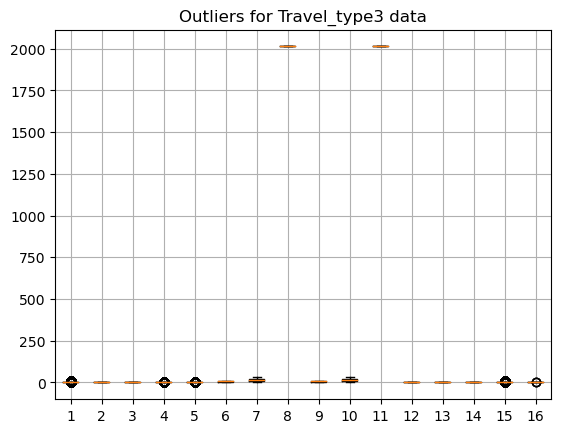

In [235]:
plt.boxplot(data_features_cat3)
plt.grid()
plt.title("Outliers for Travel_type3 data")
plt.show()

In [236]:
#Observation - No outliers in Category3 data

In [237]:
corr_mat = data_features_cat3.corr()

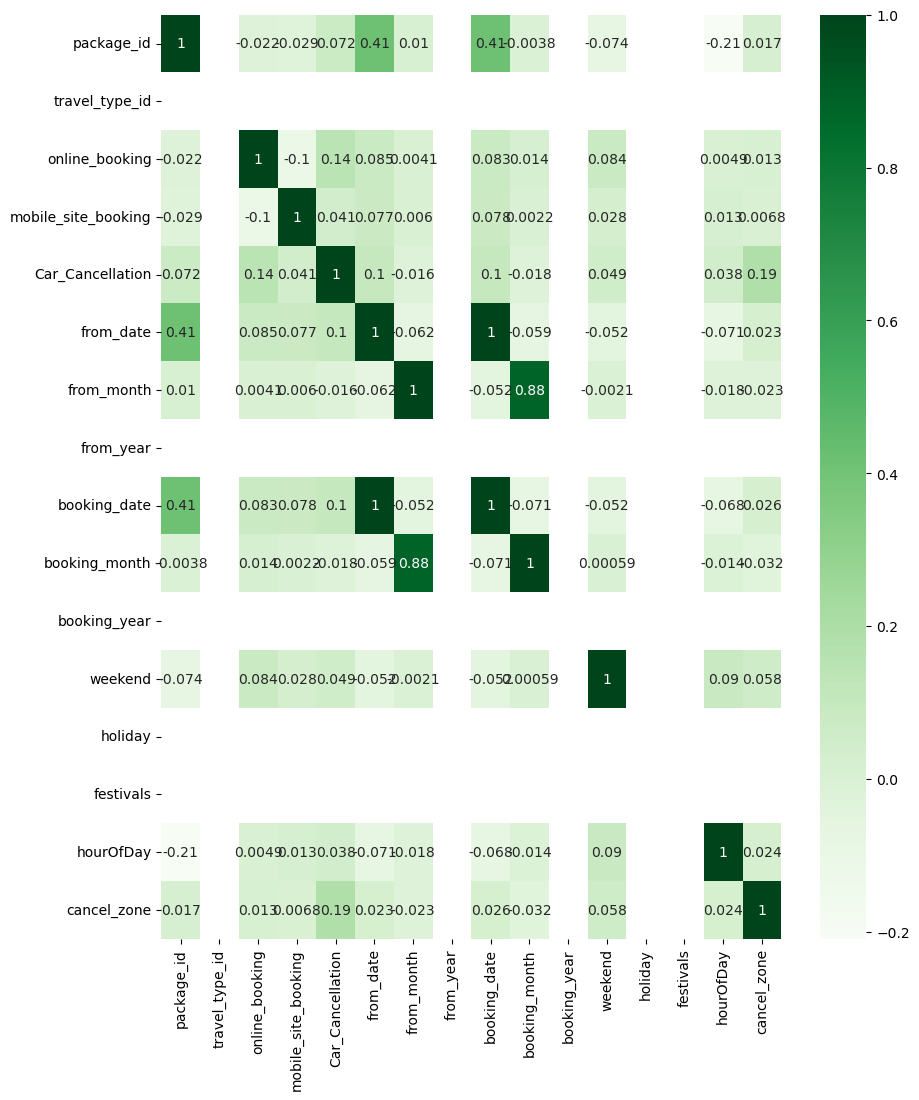

In [238]:
plt.figure(figsize=(10,12))
sns.heatmap(corr_mat,annot=True,cmap='Greens')
plt.show()

# Observation
1. booking_month and from_month has high correlation - 88%
2. from_date and booking_date has very high correlation - 100%
3. travel_type_id, from_year, booking_year, holiday, festivals has only 1 data

Conclusion -

1. booking_month, booking_date can be dropped
2. travel_type_id, from_year, booking_year, holiday, festivals can be dropped


In [239]:
data_features_cat3 = data_features_cat3.drop('booking_month',axis=1)
data_features_cat3 = data_features_cat3.drop('booking_date',axis=1)
data_features_cat3 = data_features_cat3.drop('travel_type_id',axis=1)
data_features_cat3 = data_features_cat3.drop('from_year',axis=1)
data_features_cat3 = data_features_cat3.drop('booking_year',axis=1)
data_features_cat3 = data_features_cat3.drop('holiday',axis=1)
data_features_cat3 = data_features_cat3.drop('festivals',axis=1)
data_features_cat3.head()

,package_id,online_booking,mobile_site_booking,Car_Cancellation,from_date,from_month,weekend,hourOfDay,cancel_zone
8,2.0,0,0,0,1,1,0,3,1
20,2.0,0,0,0,1,1,0,3,1
23,1.0,0,0,0,1,1,0,3,1
34,1.0,1,0,0,1,1,0,4,1
47,2.0,0,0,0,1,2,0,6,1


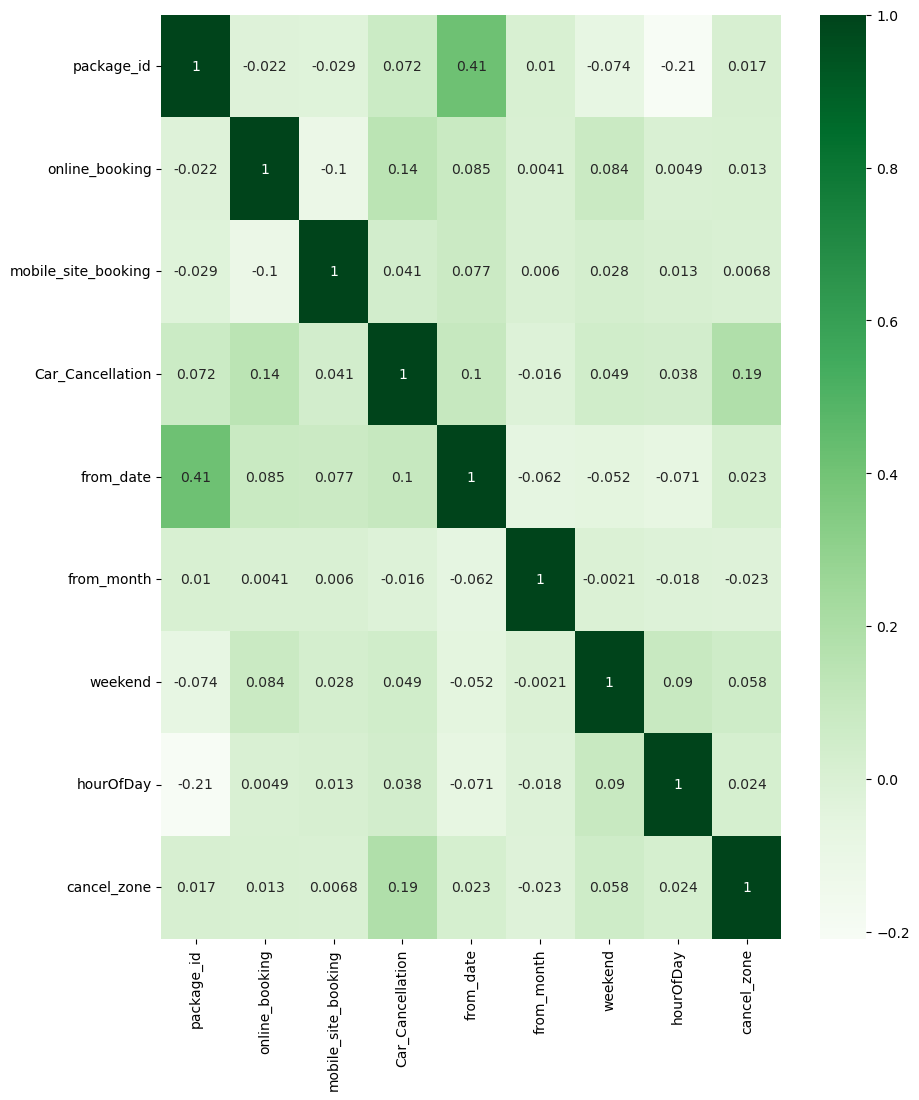

In [240]:
plt.figure(figsize=(10,12))
sns.heatmap(data_features_cat3.corr(),annot=True,cmap='Greens')
plt.show()

### Feature wise check

In [241]:
data_features_cat3.columns

Index(['package_id', 'online_booking', 'mobile_site_booking',
       'Car_Cancellation', 'from_date', 'from_month', 'weekend', 'hourOfDay',
       'cancel_zone'],
      dtype='object')

In [242]:
data_features_cat3['package_id'].value_counts()

1.0    3503
2.0    2651
6.0     502
4.0     412
3.0     375
7.0     101
5.0       6
Name: package_id, dtype: int64

In [243]:
data_features_cat3['online_booking'].value_counts()

0    5409
1    2141
Name: online_booking, dtype: int64

In [244]:
data_features_cat3['mobile_site_booking'].value_counts()

0    7351
1     199
Name: mobile_site_booking, dtype: int64

In [245]:
data_features_cat3['from_date'].value_counts()

9     926
10    866
8     854
5     811
6     799
7     743
11    558
4     538
3     530
2     465
1     460
Name: from_date, dtype: int64

In [246]:
data_features_cat3['from_month'].value_counts()

24    300
19    285
16    277
9     276
12    267
3     264
10    264
20    262
26    261
13    258
21    252
5     249
6     249
14    249
11    247
2     243
4     243
1     241
30    235
23    232
8     231
7     231
25    231
17    230
15    228
22    226
27    222
29    221
28    221
18    211
31    144
Name: from_month, dtype: int64

In [247]:
data_features_cat3['Car_Cancellation'].value_counts()

0    7214
1     336
Name: Car_Cancellation, dtype: int64

In [248]:
data_features_cat3['weekend'].value_counts()

0    4693
1    2857
Name: weekend, dtype: int64

In [249]:
data_features_cat3['hourOfDay'].value_counts()

2    2912
3    1652
1    1522
4    1092
6     190
5     182
Name: hourOfDay, dtype: int64

### Final data features with traveltype=3 values

In [250]:
data_features_cat3.head()

,package_id,online_booking,mobile_site_booking,Car_Cancellation,from_date,from_month,weekend,hourOfDay,cancel_zone
8,2.0,0,0,0,1,1,0,3,1
20,2.0,0,0,0,1,1,0,3,1
23,1.0,0,0,0,1,1,0,3,1
34,1.0,1,0,0,1,1,0,4,1
47,2.0,0,0,0,1,2,0,6,1


In [251]:
data_features_cat3.shape

(7550, 9)

In [252]:
data_features_cat3.describe()

,package_id,online_booking,mobile_site_booking,Car_Cancellation,from_date,from_month,weekend,hourOfDay,cancel_zone
count,7550.000000,7550.000000,7550.000000,7550.000000,7550.000000,7550.000000,7550.000000,7550.000000,7550.000000
mean,2.030066,0.283576,0.026358,0.044503,6.509404,15.663709,0.378411,2.479470,0.652980
std,1.461756,0.450763,0.160207,0.206224,2.934640,8.752443,0.485023,1.178489,0.491928
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,4.000000,8.000000,0.000000,2.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,7.000000,16.000000,0.000000,2.000000,1.000000
75%,2.000000,1.000000,0.000000,0.000000,9.000000,23.000000,1.000000,3.000000,1.000000
max,7.000000,1.000000,1.000000,1.000000,11.000000,31.000000,1.000000,6.000000,3.000000


In [253]:
data_features_cat3.to_csv(r'C:\Users\shamr\OneDrive\Shamreen\ML\LearnBay\Stats&ML\Capstone Project\Dataset\cat3.csv')